In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
#from statsmodels.tsa.stattools import ccovf, ccf

data = pd.read_pickle('../data/WT2017.pkl')

data.filter(like='Pressure').columns

In [2]:
def unify_datasets():
    data = pd.read_pickle('../Data/WT2019.pkl')
    
    for year in [2017,2018,2019]:
        data_year = pd.read_pickle(f'../Data/WT{year}.pkl')
        data = pd.concat([data, data_year])

    data = data.filter(like='WT1')
    return data

In [3]:
data = unify_datasets()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 236304 entries, 2019-01-01 00:00:00 to 2019-12-31 23:50:00
Data columns (total 58 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   WT1_Grid Production Power Avg. (1)                          235431 non-null  float64
 1   WT1_Ambient WindSpeed Avg. (10)                             235431 non-null  float64
 2   WT1_Ambient WindDir Absolute Avg. (19)                      235431 non-null  float64
 3   WT1_Ambient Temp. Avg. (28)                                 235431 non-null  float64
 4   WT1_Ambient WindDir Relative Avg. (37)                      235431 non-null  float64
 5   WT1_Avg. direction (46)                                     235431 non-null  float64
 6   WT1_Rotor RPM Avg. (55)                                     235431 non-null  float64
 7   WT1_Rotor RPM Max. (64)               

## Data pre-processing

In [4]:
# Averaging duplicated dates
data = data.groupby('date').mean()

# Interpolating NaN values
for column in data.columns:
    data[column].interpolate(method='pchip', inplace=True)

# Smoothing the curve
for column in data.columns:
    data[column] = data[column].rolling(1008).mean()
data = data.iloc[1007:]

# Dropping columns with NaN values
data.dropna(axis=1, inplace=True, how='any')

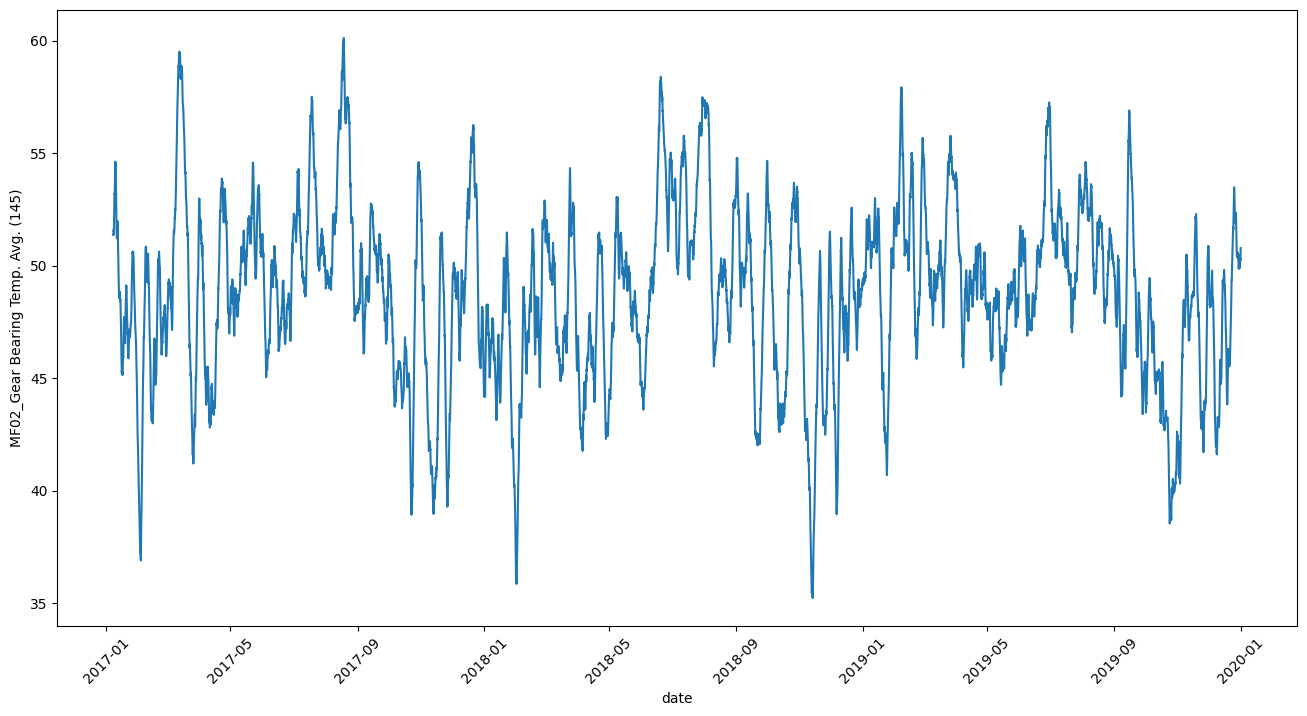

In [5]:
fig, ax = plt.subplots(figsize =(16,8))
sns.lineplot(data=data['WT1_Gear Bearing Temp. Avg. (145)'], ax=ax)
_=plt.xticks(rotation=45)

<Axes: ylabel='Frequency'>

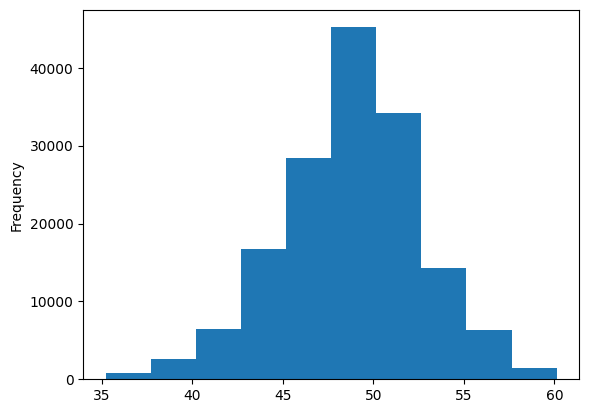

In [6]:
data['WT1_Gear Bearing Temp. Avg. (145)'].plot(kind='hist')

In [12]:
target = 'WT1_Gear Bearing Temp. Avg. (145)'

<Axes: ylabel='Frequency'>

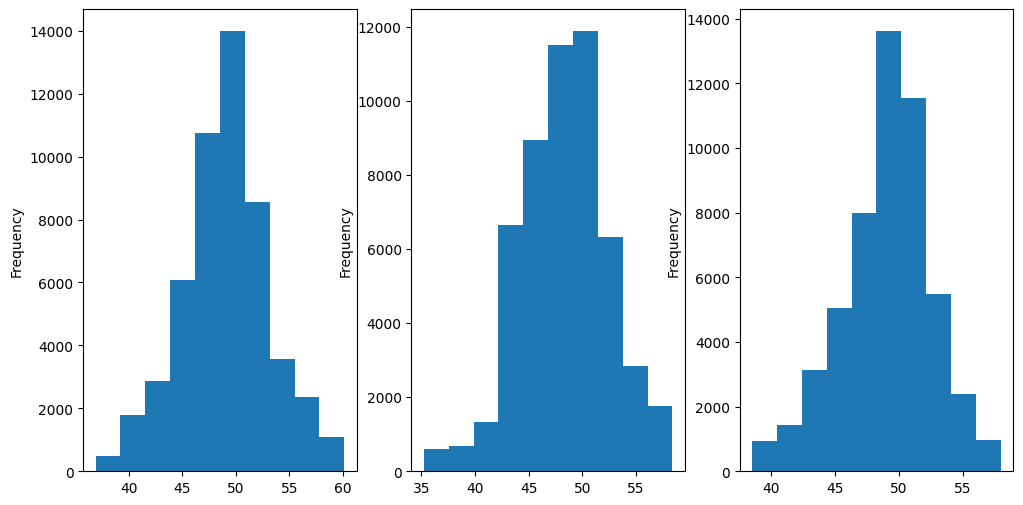

In [19]:
# Plot histogram for 2017 and 2018 using subplots
fig, ax = plt.subplots(1,3,figsize=(12,6))
data[target].loc['2017-01-01':'2017-12-31'].plot(kind='hist', ax=ax[0])
data[target].loc['2018-01-01':'2018-12-31'].plot(kind='hist', ax=ax[1])
data[target].loc['2019-01-01':'2019-12-31'].plot(kind='hist', ax=ax[2])

<Axes: >

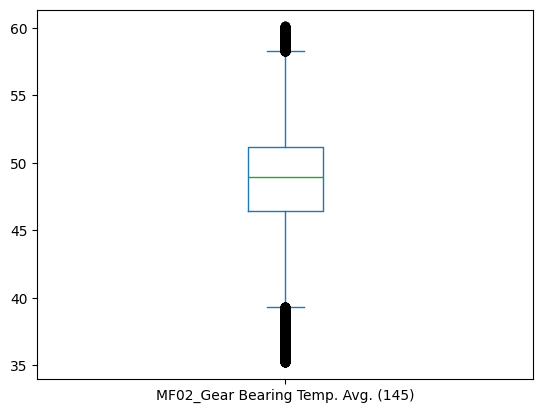

In [7]:
data['WT1_Gear Bearing Temp. Avg. (145)'].plot(kind='box')

In [ ]:
correlations = data.corr(method='kendall')['MF05_Gear Bearing Temp. Avg. (148)']

In [ ]:
correlations.sort_values(ascending=False)

In [ ]:
@interact
def plot_variable(column=data.columns, rolling_window=1008):
    fig = px.line(data[column].rolling(rolling_window).mean())
    return fig.show()

In [ ]:
lag_corr_statsmodels = ccf(data['MF12_Gear Bearing Temp. Avg. (152)'], data['MF12_Gear Bearing Temp.B Avg. (161)'], unbiased=False)
lag_corr_statsmodels

In [ ]:
len(lag_corr_statsmodels)

In [ ]:
data.index = pd.to_datetime(data['date'])
data = pd.Series(data['MF12_Gear Bearing Temp. Avg. (152)'])
data

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
data = data.resample(rule='H').mean()
data

In [ ]:
data.interpolate(method='pchip', inplace=True)

In [ ]:
data.autocorr(lag=1)

In [ ]:
# Compute the acf array of HRB
acf_array = acf(data)
print(acf_array)

In [ ]:
# Plot the acf function
plot_acf(data, alpha=1)
plt.show()